# Mesh dependency of axis-symmetric bubble velocities and shapes

Three bubbles are investigated:
- dimpled ellipsoidal $Eo=243$, $Mo=266$, $Ga^\prime=15.24$
- spherical cap (closed wake) $Eo=115$, $Mo=4.63\times 10^{-3}$, $Ga^\prime = 135$
- a $d_{eq}=1.8~mm$ bubble rising in water at 20°C, $Eo=0.4361$, $Mo=2.5728\times 10^{-11}$, $Ga^\prime = 238.29$
    
The shapes are compared at time instances for which the shapes are steady (mostly). The mesh size was varied by setting the maximum allowed refinement level to 15, 16, and 17 (for the dimpled ellipsoidal bubble).

In [1]:
import pickle
import helper_module as hm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

rc('text', usetex=True)

data_path = "../data/"
output_path = "../output/"

case_list = ["dell_l15", "dell_l16", "dell_l17", "scap_l15", "scap_l16", "wa18_l15", "wa18_l16"]

In [2]:
log_files = {}
for case in case_list:
    full_path = data_path + case + "/log." + case + ".csv"
    log_files[case] = hm.Logfile(full_path)
    usecols = ['time', 'u_x', 'x']
    log_files[case].read_logfile(usecols=usecols)

Successfully read file ../data/dell_l15/log.dell_l15.csv
Successfully read file ../data/dell_l16/log.dell_l16.csv
Successfully read file ../data/dell_l17/log.dell_l17.csv
Successfully read file ../data/scap_l15/log.scap_l15.csv
Successfully read file ../data/scap_l16/log.scap_l16.csv
Successfully read file ../data/wa18_l15/log.wa18_l15.csv
Successfully read file ../data/wa18_l16/log.wa18_l16.csv


In [3]:
log_files["dell_l15"].log.head()

,time,x,u_x
0,0.000000,3.500000,0.000000
1,0.014128,3.500171,0.027671
2,0.027916,3.500702,0.052530
3,0.041705,3.501574,0.076405
4,0.055493,3.502766,0.099031


In [4]:
# some general plot settings
upper_plot_bounds = [0.0, 0.4, 0.8, 0.6]
lower_plot_bounds = [0.0, 0.0, 0.8, 0.35]
t_min = -1
alpha_window = 0.1
styles = [':', '--', '-']
colors = ["darkgrey", "darkgrey", "black"]
labels = ["Level 14", "Level 15", "Level 16"]
highlight_color = "C0"

# convinience function for saving plots as png and pdf
def savefig(name):
    plt.savefig(output_path + name + ".png", bbox_inches="tight", dpi=300)
    plt.savefig(output_path + name + ".pdf", bbox_inches="tight")

## Dimpled ellipsoidal

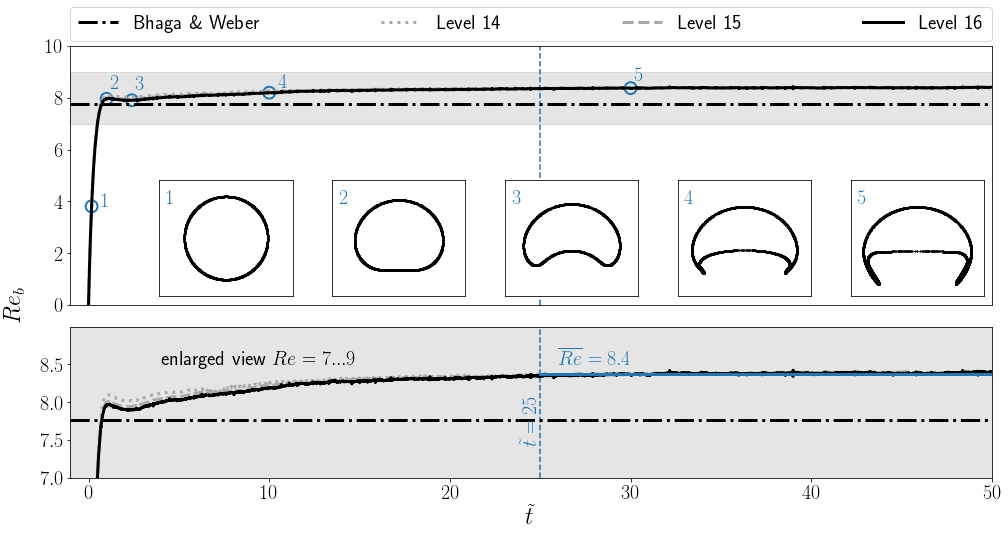

In [5]:
fig = plt.figure(figsize=(hm.figure_width, 6))

# axis limits and zoom window definition
t_max = 50.0
tw_min = 25.0
tw_max = 50.0
re_zoom_min = 7.0
re_zoom_max = 9.0
Ga = 15.24

# create basis for upper part of the plot
ax1 = plt.axes(upper_plot_bounds, xticks=[], xlim=[t_min, t_max], ylim=[0, 10])
ax1.fill_between([-1, 120], [re_zoom_min, re_zoom_min], [re_zoom_max, re_zoom_max], color='k', alpha=alpha_window)
ax1.tick_params(labelsize=hm.fontsize_tick)
ax1.axvline(tw_min, 0, 1, linestyle='--', color=highlight_color)
ax1.text(-4.5, 0, r"$Re_b$", va='center', rotation='vertical', fontsize=hm.fontsize_label)

# create basis for lower part of the plot
ax2 = plt.axes(lower_plot_bounds, yticks=[7.0, 7.5, 8.0, 8.5], xlim=[t_min, t_max], ylim=[re_zoom_min, re_zoom_max])
ax2.patch.set_facecolor('k')
ax2.patch.set_alpha(alpha_window)
ax2.set_xlabel(r"$\tilde{t}$", fontsize=hm.fontsize_label)
ax2.tick_params(labelsize=hm.fontsize_tick)
ax2.axvline(tw_min, 0, 1, linestyle='--', color=highlight_color)

lines = [] # lines to appear in the legend

# reference curve Bhaga and Weber 1981
lines.append(ax1.plot([t_min, t_max], [7.77, 7.77], linestyle='-.', lw=hm.line_width, color='k', label="Bhaga \& Weber")[0])
ax2.plot([t_min, t_max], [7.77, 7.77], linestyle='-.', lw=hm.line_width, color='k')

# plot the numerical data in both sub-plots
for i, level in enumerate(range(15,18)):
    log = log_files["dell_l{:2d}".format(level)]
    t, re = log.get_profile("time", "u_x")
    re = re * Ga
    lines.append(ax1.plot(t, re, color=colors[i], linestyle=styles[i], lw=hm.line_width, label=labels[i])[0])
    ax2.plot(t, re, color=colors[i], linestyle=styles[i], lw=hm.line_width)
    
# indicate statistical values in the lower plot (mean of finest mesh)
re_mean = log_files["dell_l17"].apply_to_range("time", tw_min, tw_max, "u_x", np.mean) * Ga
ax2.plot([tw_min, tw_max], [re_mean, re_mean], color=highlight_color, lw=hm.line_width)
ax2.text(26, 8.5, r"$\overline{{Re}}={:.1f}$".format(re_mean), fontsize=hm.fontsize_tick, color=highlight_color)
ax2.text(24, 7.9, r"$\tilde{{t}}={:.0f}$".format(tw_min), rotation='vertical', fontsize=hm.fontsize_tick, color=highlight_color)
ax2.text(4, 8.5, r"enlarged view $Re={:.0f}...{:.0f}$".format(re_zoom_min, re_zoom_max), fontsize=hm.fontsize_tick, color='k')

# include bubble shapes of selected time instances (snap shots) into the upper plot
closest_entries = []
for t in [0.17, 1.0, 2.4, 10.0, 30.0]:
    row = log_files["dell_l17"].find_closest("time", t)
    closest_entries.append(row)
    ax1.scatter(row.time, row.u_x*Ga, marker='o', s=140, facecolors='none', edgecolors=highlight_color, linewidth=2)

# draw shapes and position labels close to circles
offset_t = [0.5, 0.2, 0.2, 0.5, 0.2]
offset_re = [-0., 0.4, 0.4, 0.2, 0.3]
for i, row in enumerate(closest_entries):
    ax1.text(row.time+offset_t[i], row.u_x*Ga+offset_re[i], r"${}$".format(i+1), color=highlight_color, fontsize=hm.fontsize_tick)
    ax = plt.axes([0.15*(i+1)-0.15, 0.42, 0.27, 0.27], xticks=[], yticks=[], xlim=[-0.8, 0.8], ylim=[-0.7, 0.7])
    ax.set_aspect('equal')
    path_shape = data_path + "dell_l17/plic_clean/plic_{:06d}.pkl".format(row.index.values[0]*10)
    with open(path_shape, 'rb') as file:
        shape = pickle.load(file)
    ax.scatter(shape.py.values, shape.px.values-row.x.values, s=1, color='k')
    ax.scatter(-shape.py.values, shape.px.values-row.x.values, s=1, color='k')
    ax.text(ax.get_xlim()[0]*0.9, ax.get_ylim()[1]*0.6, r"${}$".format(i+1), color=highlight_color, fontsize=hm.fontsize_tick)

ax1.legend(handles=lines, bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=4, mode="expand", borderaxespad=0., fontsize=hm.fontsize_legend)
savefig("dell_rise_velocity")

## Spherical cap

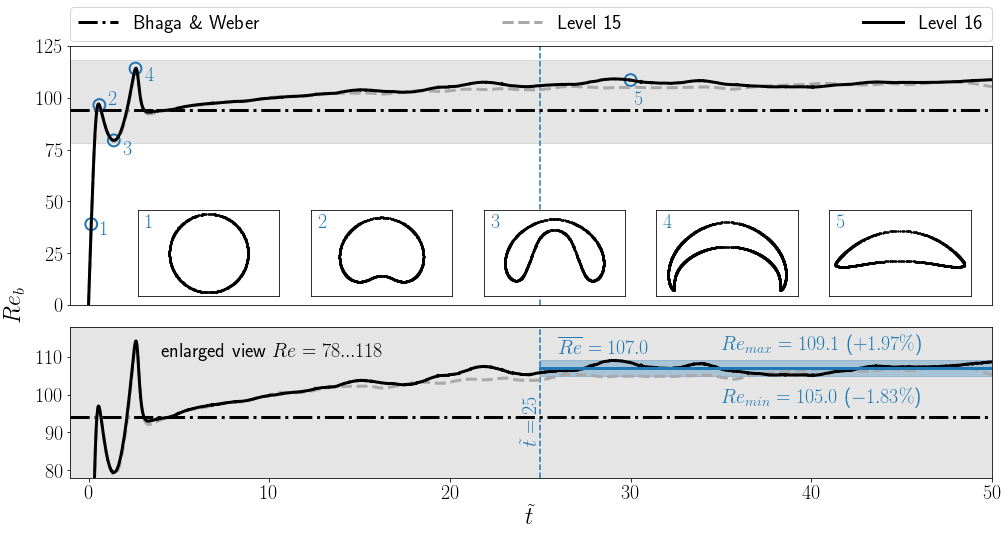

In [6]:
fig = plt.figure(figsize=(hm.figure_width, 6))

# axis limits and zoom window definition
t_max = 50.0
tw_min = 25.0
tw_max = 50.0
re_zoom_min = 78.0
re_zoom_max = 118.0
Ga = 134.6257

# create basis for upper part of the plot
ax1 = plt.axes(upper_plot_bounds, xticks=[], xlim=[t_min, t_max], ylim=[0, 125])
ax1.fill_between([-1, 120], [re_zoom_min, re_zoom_min], [re_zoom_max, re_zoom_max], color='k', alpha=alpha_window)
ax1.tick_params(labelsize=hm.fontsize_tick)
ax1.axvline(tw_min, 0, 1, linestyle='--', color=highlight_color)
ax1.text(-4.5, 0, r"$Re_b$", va='center', rotation='vertical', fontsize=hm.fontsize_label)

# create basis for lower part of the plot
ax2 = plt.axes(lower_plot_bounds, yticks=[80, 90, 100, 110], xlim=[t_min, t_max], ylim=[re_zoom_min, re_zoom_max])
ax2.patch.set_facecolor('k')
ax2.patch.set_alpha(alpha_window)
ax2.set_xlabel(r"$\tilde{t}$", fontsize=hm.fontsize_label)
ax2.tick_params(labelsize=hm.fontsize_tick)
ax2.axvline(tw_min, 0, 1, linestyle='--', color=highlight_color)

lines = [] # lines to appear in the legend

# reference curve Bhaga and Weber 1981
lines.append(ax1.plot([t_min, t_max], [94.0, 94.0], linestyle='-.', lw=hm.line_width, color='k', label="Bhaga \& Weber")[0])
ax2.plot([t_min, t_max], [94.0, 94.0], linestyle='-.', lw=hm.line_width, color='k')

# plot the numerical data in both sub-plots
for i, level in enumerate(range(15,17)):
    log = log_files["scap_l{:2d}".format(level)]
    t, re = log.get_profile("time", "u_x")
    re = re * Ga
    lines.append(ax1.plot(t, re, color=colors[i+1], linestyle=styles[i+1], lw=hm.line_width, label=labels[i+1])[0])
    ax2.plot(t, re, color=colors[i+1], linestyle=styles[i+1], lw=hm.line_width)
    
# indicate statistical values in the lower plot (mean of finest mesh)
re_mean = log_files["scap_l16"].apply_to_range("time", tw_min, tw_max, "u_x", np.mean) * Ga
re_min, re_max = log_files["scap_l16"].get_min_max("time", tw_min, tw_max, "u_x")
re_min *= Ga
re_max *= Ga
ax2.fill_between([tw_min, tw_max], [re_min, re_min], [re_max, re_max], color=highlight_color, alpha=0.3)
ax2.plot([tw_min, tw_max], [re_mean, re_mean], color=highlight_color, lw=hm.line_width)
ax2.text(26, 111, r"$\overline{{Re}}={:.1f}$".format(re_mean), fontsize=hm.fontsize_tick, color=highlight_color)
ax2.text(24, 96, r"$\tilde{{t}}={:.0f}$".format(tw_min), rotation='vertical', fontsize=hm.fontsize_tick, color=highlight_color)
ax2.text(4, 110, r"enlarged view $Re={:.0f}...{:.0f}$".format(re_zoom_min, re_zoom_max), fontsize=hm.fontsize_tick, color='k')
ax2.text(35, 97, r"$Re_{{min}}={:.1f}$ (${:+.2f}\%$)".format(re_min, (re_min-re_mean)/re_mean*100), fontsize=hm.fontsize_tick, color=highlight_color)
ax2.text(35, 111, r"$Re_{{max}}={:.1f}$ (${:+.2f}\%$)".format(re_max, (re_max-re_mean)/re_mean*100), fontsize=hm.fontsize_tick, color=highlight_color)

# include bubble shapes of selected time instances (snap shots) into the upper plot
closest_entries = []
for t in [0.15, 0.6, 1.4, 2.6, 30.0]:
    row = log_files["scap_l16"].find_closest("time", t)
    closest_entries.append(row)
    ax1.scatter(row.time, row.u_x*Ga, marker='o', s=140, facecolors='none', edgecolors=highlight_color, linewidth=2)

# draw shapes and position labels close to circles
offset_t = [0.5, 0.5, 0.5, 0.5, 0.2]
offset_re = [-5., 0., -7., -6., -12.]
for i, row in enumerate(closest_entries):
    ax1.text(row.time+offset_t[i], row.u_x*Ga+offset_re[i], r"${}$".format(i+1), color=highlight_color, fontsize=hm.fontsize_tick)
    ax = plt.axes([0.15*(i+1)-0.13, 0.42, 0.20, 0.20], xticks=[], yticks=[], xlim=[-0.9, 0.9], ylim=[-0.55, 0.55])
    ax.set_aspect('equal')
    path_shape = data_path + "scap_l16/plic_clean/plic_{:06d}.pkl".format(row.index.values[0]*10)
    with open(path_shape, 'rb') as file:
        shape = pickle.load(file)
    ax.scatter(shape.py.values, shape.px.values-row.x.values, s=1, color='k')
    ax.scatter(-shape.py.values, shape.px.values-row.x.values, s=1, color='k')
    ax.text(ax.get_xlim()[0]*0.9, ax.get_ylim()[1]*0.6, r"${}$".format(i+1), color=highlight_color, fontsize=hm.fontsize_tick)

ax1.legend(handles=lines, bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=4, mode="expand", borderaxespad=0., fontsize=hm.fontsize_legend)
savefig("scap_rise_velocity")

## Water 05 (1.8mm equivalent diameter, 20°C)

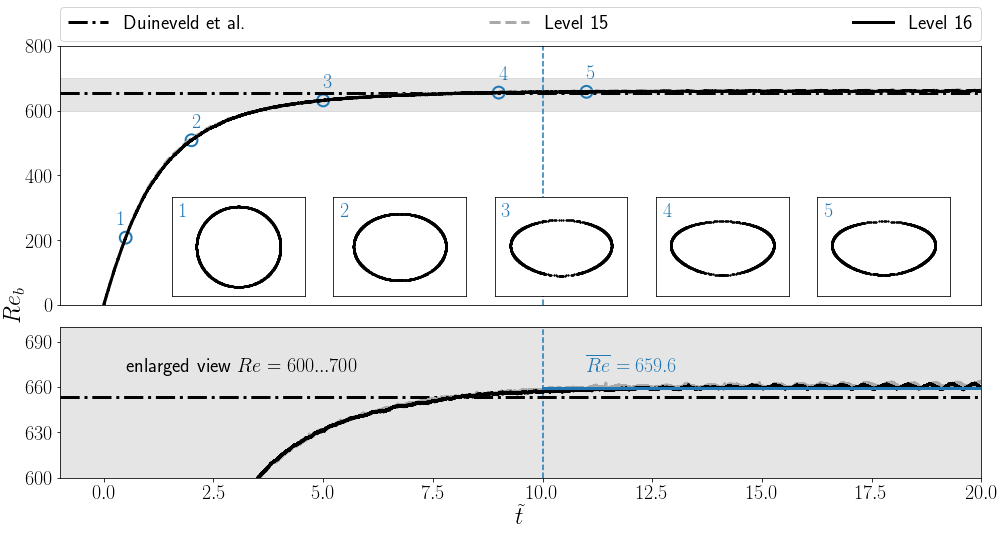

In [7]:
fig = plt.figure(figsize=(hm.figure_width, 6))

# axis limits and zoom window definition
t_max = 20.0
tw_min = 10.0
tw_max = 20.0
re_zoom_min = 600.0
re_zoom_max = 700.0
Ga = 238.2872

# create basis for upper part of the plot
ax1 = plt.axes(upper_plot_bounds, xticks=[], xlim=[t_min, t_max], ylim=[0, 800])
ax1.fill_between([-1, 120], [re_zoom_min, re_zoom_min], [re_zoom_max, re_zoom_max], color='k', alpha=alpha_window)
ax1.tick_params(labelsize=hm.fontsize_tick)
ax1.axvline(tw_min, 0, 1, linestyle='--', color=highlight_color)
ax1.text(-2.2, 0, r"$Re_b$", va='center', rotation='vertical', fontsize=hm.fontsize_label)

# create basis for lower part of the plot
ax2 = plt.axes(lower_plot_bounds, yticks=[600, 630, 660, 690], xlim=[t_min, t_max], ylim=[re_zoom_min, re_zoom_max])
ax2.patch.set_facecolor('k')
ax2.patch.set_alpha(alpha_window)
ax2.set_xlabel(r"$\tilde{t}$", fontsize=hm.fontsize_label)
ax2.tick_params(labelsize=hm.fontsize_tick)
ax2.axvline(tw_min, 0, 1, linestyle='--', color=highlight_color)

lines = [] # lines to appear in the legend

# reference curve Duineveld et al. 1995
lines.append(ax1.plot([t_min, t_max], [653.64, 653.64], linestyle='-.', lw=hm.line_width, color='k', label="Duineveld et al.")[0])
ax2.plot([t_min, t_max], [653.64, 653.64], linestyle='-.', lw=hm.line_width, color='k')

# plot the numerical data in both sub-plots
for i, level in enumerate(range(15,17)):
    log = log_files["wa18_l{:2d}".format(level)]
    t, re = log.get_profile("time", "u_x")
    re = re * Ga
    lines.append(ax1.plot(t, re, color=colors[i+1], linestyle=styles[i+1], lw=hm.line_width, label=labels[i+1])[0])
    ax2.plot(t, re, color=colors[i+1], linestyle=styles[i+1], lw=hm.line_width)
    
# indicate statistical values in the lower plot (mean of finest mesh)
re_mean = log_files["wa18_l16"].apply_to_range("time", tw_min, tw_max, "u_x", np.mean) * Ga
ax2.plot([tw_min, tw_max], [re_mean, re_mean], color=highlight_color, lw=hm.line_width)
ax2.text(11.0, 670, r"$\overline{{Re}}={:.1f}$".format(re_mean), fontsize=hm.fontsize_tick, color=highlight_color)
ax2.text(0.5, 670, r"enlarged view $Re={:.0f}...{:.0f}$".format(re_zoom_min, re_zoom_max), fontsize=hm.fontsize_tick, color='k')

# include bubble shapes of selected time instances (snap shots) into the upper plot
closest_entries = []
for t in [0.5, 2.0, 5.0, 9.0, 11.0]:
    row = log_files["wa18_l16"].find_closest("time", t)
    closest_entries.append(row)
    ax1.scatter(row.time, row.u_x*Ga, marker='o', s=140, facecolors='none', edgecolors=highlight_color, linewidth=2)

# draw shapes and position labels close to circles
offset_t = [-0.2, 0.0, 0.0, 0.0, 0.0]
offset_re = [40, 40, 40, 40, 40]
for i, row in enumerate(closest_entries):
    ax1.text(row.time+offset_t[i], row.u_x*Ga+offset_re[i], r"${}$".format(i+1), color=highlight_color, fontsize=hm.fontsize_tick)
    ax = plt.axes([0.14*(i+1)-0.1, 0.42, 0.23, 0.23], xticks=[], yticks=[], xlim=[-0.8, 0.8], ylim=[-0.6, 0.6])
    ax.set_aspect('equal')
    path_shape = data_path + "wa18_l16/plic_clean/plic_{:06d}.pkl".format(row.index.values[0]*10)
    with open(path_shape, 'rb') as file:
        shape = pickle.load(file)
    ax.scatter(shape.py.values, shape.px.values-row.x.values, s=1, color='k')
    ax.scatter(-shape.py.values, shape.px.values-row.x.values, s=1, color='k')
    ax.text(ax.get_xlim()[0]*0.9, ax.get_ylim()[1]*0.6, r"${}$".format(i+1), color=highlight_color, fontsize=hm.fontsize_tick)

ax1.legend(handles=lines, bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=4, mode="expand", borderaxespad=0., fontsize=hm.fontsize_legend)

savefig("wa18_rise_velocity")

# Mesh dependency of bubble shapes

In [8]:
# organize points in PLIC facets and transform to local reference frame
def assemble_facets(name, time):
    row = log_files[name].find_closest("time", time)
    path_shape = data_path + name + "/plic_clean/plic_{:06d}.pkl".format(row.index.values[0]*10)
    with open(path_shape, 'rb') as file:
        shape = pickle.load(file)
    facets = []
    for j in range(0, len(shape.px.values)-1, 2):
        facets.append([(shape.py.values[j], shape.px.values[j]-row.x.values),
                       (shape.py.values[j+1], shape.px.values[j+1]-row.x.values)])
    return facets

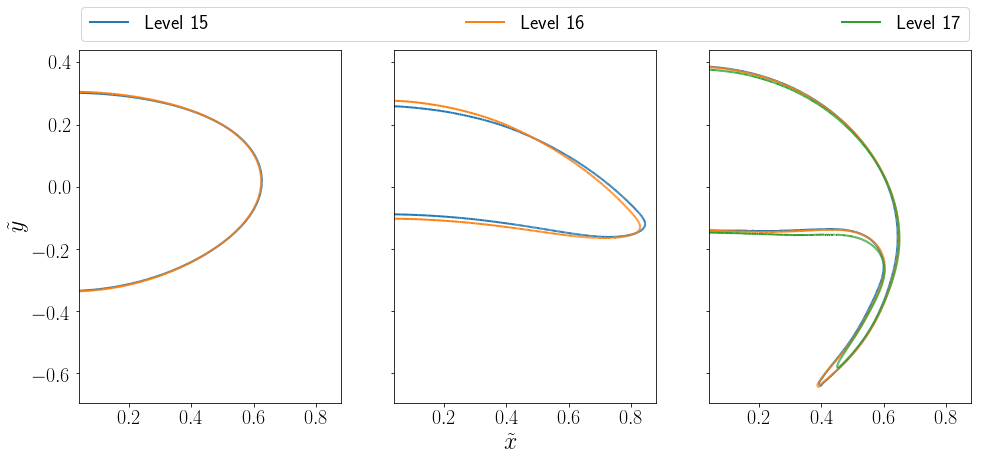

In [13]:
from matplotlib import collections  as mc

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(hm.figure_width, 6.5), sharey=True, sharex=True)

line_color = ["C0", "C1", "C2"]
labels = ['Level 15', 'Level 16', 'Level 17']
line_scale = 0.66

lines = [] # lines to appear in legend

# thrid plot: water 1.8mm
for i, name in enumerate(["wa18_l15", "wa18_l16"]):
    facets = assemble_facets(name, 20)
    lc = mc.LineCollection(facets, colors=line_color[i], linewidths=hm.line_width*line_scale, linestyle="-")
    ax1.add_collection(lc)
    
# second plot: spherical cap
for i, name in enumerate(["scap_l15", "scap_l16"]):
    facets = assemble_facets(name, 50)
    lc = mc.LineCollection(facets, colors=line_color[i], linewidths=hm.line_width*line_scale, linestyle="-")
    ax2.add_collection(lc)
    
# first plot: dimpled ellipsoidal
for i, name in enumerate(["dell_l15", "dell_l16", "dell_l17"]):
    facets = assemble_facets(name, 50)
    lc = mc.LineCollection(facets, colors=line_color[i], linewidths=hm.line_width*line_scale,
                           linestyle="-", label=labels[i])
    lines.append(lc)
    ax3.add_collection(lc)
    ax3.autoscale()
    
for ax in [ax1, ax2, ax3]:
    ax.set_aspect('equal')
    ax.tick_params(labelsize=hm.fontsize_tick)
    ax.set_xlim(0.0, 0.92)
    ax.set_xticks([0.2, 0.4, 0.6, 0.8])
    
fig.text(0.5, 0.04, r"$\tilde{x}$", ha='center', va='center', fontsize=hm.fontsize_label)
ax1.set_ylabel(r"$\tilde{y}$", fontsize=hm.fontsize_label)
ax1.legend(handles=lines, bbox_to_anchor=(0., 1.02, 3.4, .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0.1, fontsize=hm.fontsize_tick)

savefig("shapes_mesh_dep")

# Shape of dimpled ellipsoidal bubble over time

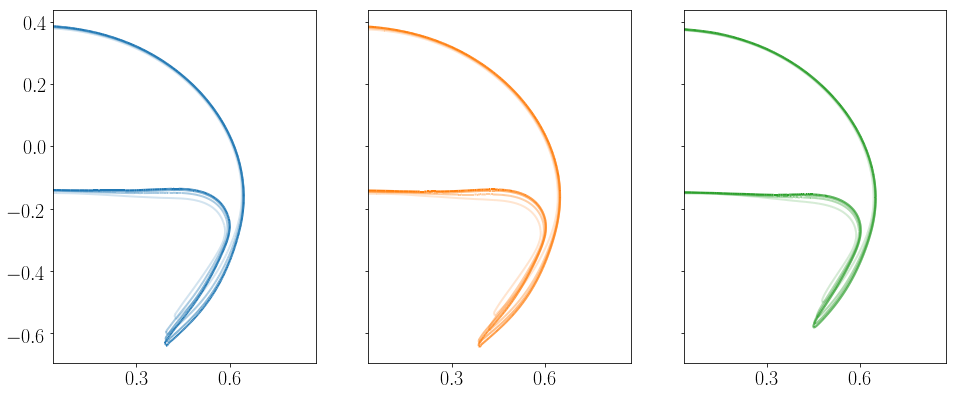

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(hm.figure_width, 6.5), sharey=True)

times = [20, 30, 40, 50]
labels = [r"$\tilde{t}" + r"{:2.1f}$".format(time) for time in times]
alpha = [0.2, 0.4, 0.6, 1.0]

for i, (time, name) in enumerate(zip(times, labels)):
    facets = assemble_facets("dell_l15", time)
    lc = mc.LineCollection(facets, colors="C0", linewidths=hm.line_width*line_scale,
                           linestyle="-", alpha=alpha[i], label=name)
    lines.append(lc)
    ax1.add_collection(lc)
    ax1.autoscale()
    
for i, (time, name) in enumerate(zip(times, labels)):
    facets = assemble_facets("dell_l16", time)
    lc = mc.LineCollection(facets, colors="C1", linewidths=hm.line_width*line_scale,
                           linestyle="-", alpha=alpha[i], label=name)
    lines.append(lc)
    ax2.add_collection(lc)
    ax2.autoscale()
    
for i, (time, name) in enumerate(zip(times, labels)):
    facets = assemble_facets("dell_l17", time)
    lc = mc.LineCollection(facets, colors="C2", linewidths=hm.line_width*line_scale,
                           linestyle="-", alpha=alpha[i], label=name)
    lines.append(lc)
    ax3.add_collection(lc)
    ax3.autoscale()
    
for ax in [ax1, ax2, ax3]:
    ax.set_aspect('equal')
    ax.tick_params(labelsize=hm.fontsize_tick)
    ax.set_xlim(0.0, 0.91)
    ax.set_xticks([0.0, 0.3, 0.6, 0.9])